In [1]:
#!pip install -U scikit-learn scipy matplotlib

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import os
import itertools
import glob
from utils import *


In [2]:
iou_treshold = 0.5
IMAGE_WIDTH = 2464
IMAGE_HEIGHT = 2056

SYNTETIC_DATA_DIRECTORY = '/cluster/home/solveijm/DNV_data'
CREATE_TESTSET = False

# Syntethic data folders to be tested on

We have trained on: 
- '2023-04-26_1656_dnv_scenario1_full_00_000_MorningClear' 
- '2023-04-26_1658_dnv_scenario1_full_00_000_MorningCloudy'
- Hurtigruta dataset

In [3]:
light_condition1 = ['2023-04-27_0820_dnv_scenario1_full_00_000_NoonClear']
light_condition2 = ['2023-04-26_1629_dnv_scenario1_full_00_000_AfternoonClear', '2023-04-26_1636_dnv_scenario1_full_00_000_EveningClear']
light_condition3 = ['2023-04-26_1700_dnv_scenario1_full_00_000_NightClear']

cloud_light1 = ['2023-04-27_0822_dnv_scenario1_full_00_000_NoonCloudy']
cloud_light2 = ['2023-04-26_1631_dnv_scenario1_full_00_000_AfternoonCloudy', '2023-04-26_1647_dnv_scenario1_full_00_000_EveningCloudy']
cloud_light3 = ['2023-04-27_0818_dnv_scenario1_full_00_000_NightCloudy']


rain_light1 = ['2023-04-27_0823_dnv_scenario1_full_00_000_NoonCloudy_Rain']
rain_light2 = ['2023-04-26_1649_dnv_scenario1_full_00_000_EveningCloudy_Rain', '2023-04-26_1633_dnv_scenario1_full_00_000_AfternoonCloudy_Rain']

foggy = ['2023-04-26_1652_dnv_scenario1_full_00_000_FoggyClear', '2023-04-26_1654_dnv_scenario1_full_00_000_FoggyCloudy']

stormy = ['2023-04-27_0829_dnv_scenario1_full_00_000_StormClouds']
stormy_rain = ['2023-04-27_0830_dnv_scenario1_full_00_000_StormyClouds_Rain']


all_conditions = [light_condition1, light_condition2, light_condition3, cloud_light1, cloud_light2, cloud_light3, rain_light1, rain_light2, foggy, stormy, stormy_rain]
all_conditions_names = ['light_condition1', 'light_condition2', 'light_condition3', 'cloud_light1', 'cloud_light2', 'cloud_light3', 'rain_light1', 'rain_light2', 'foggy', 'stormy', 'stormy_rain']


## Create test set for each folder

In [4]:
if CREATE_TESTSET:
    test_sets = {}

    for i, condition in enumerate(all_conditions):
        all_image_paths = []
        for folder in condition:
            path = os.path.join(SYNTETIC_DATA_DIRECTORY, folder)+'/images/'
            image_paths = glob.glob(f'{path}*.jpg')
            for image in image_paths:
                all_image_paths.append(os.path.join(path, image))
        test_file = os.path.join(SYNTETIC_DATA_DIRECTORY, f'test_{all_conditions_names[i]}.txt')
        test_sets[all_conditions_names[i]] = test_file
        with open(test_file, 'w+') as f:
            f.writelines('\n'.join(all_image_paths))
    print(test_sets)


# Run tests
To run these remove #! and run in terminal, or just remove # and run in ipynb

## Different light conditions

### Light condition 1

In [5]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition1.txt' imgsz=640 name=test_light_condition1 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[710  22]
 [ 52   0]]
Precision:
0.9699453551912568
Recall:
0.931758530183727


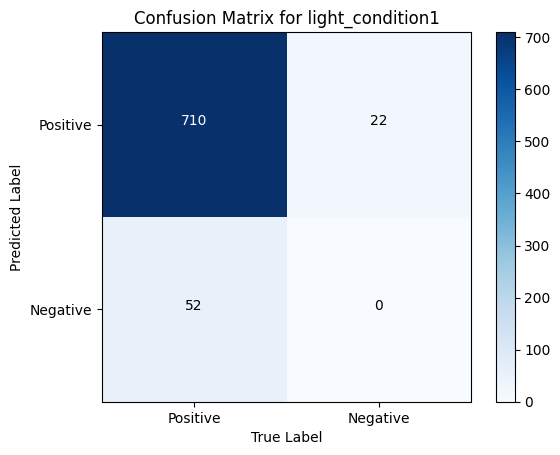

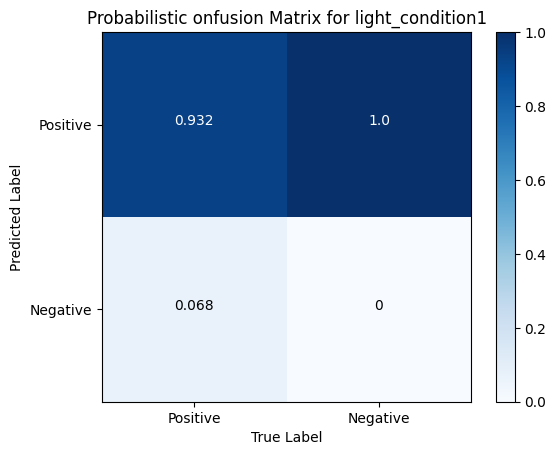



BOUNDING BOX ERRORS FOR light_condition1
IoU threshold:  0.5
Error of center x
Expected value: -0.47705653680555177
Variance: 166.92038066211293

Error of center y
Expected value: -0.3498619923611085
Variance: 177.07294537631319

Error of width
Expected value: -0.6757674791666631
Variance: 656.2611001765931

Error of height
Expected value: -3.0853888597222268
Variance: 172.44354565349866


 DROPOUT STATS


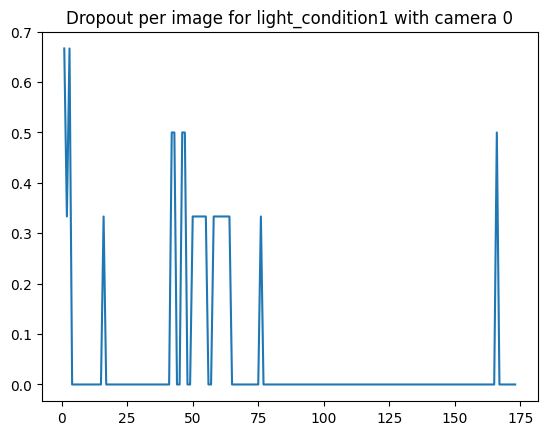

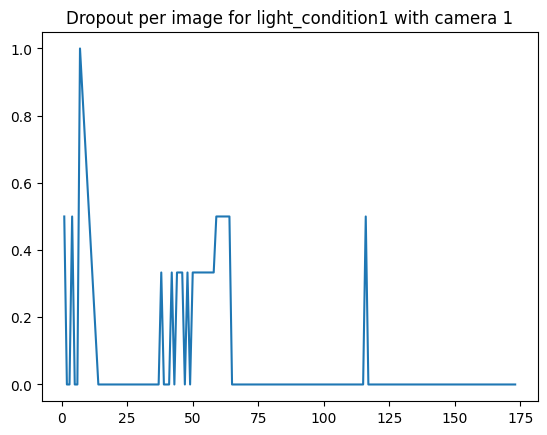

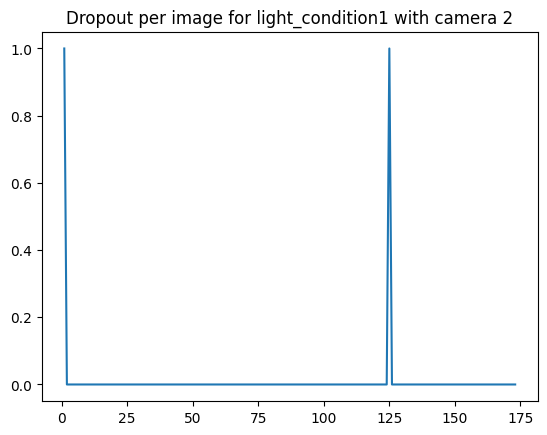

In [11]:
GROUND_TRUTH_PATHS = ['/cluster/home/solveijm/DNV_data/2023-04-27_0820_dnv_scenario1_full_00_000_NoonClear/']
PREDICTED_PATH = '../../runs/detect/test_light_condition1/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name='light_condition1')

### Light condition 2

In [7]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition2.txt' imgsz=640 name=test_light_condition2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[388 491]
 [433   0]]
Precision:
0.44141069397042093
Recall:
0.4725943970767357


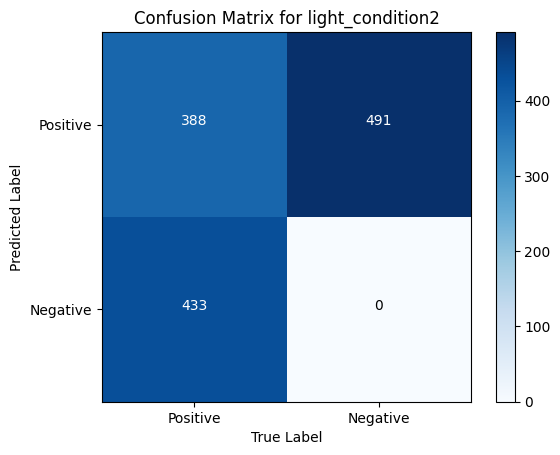

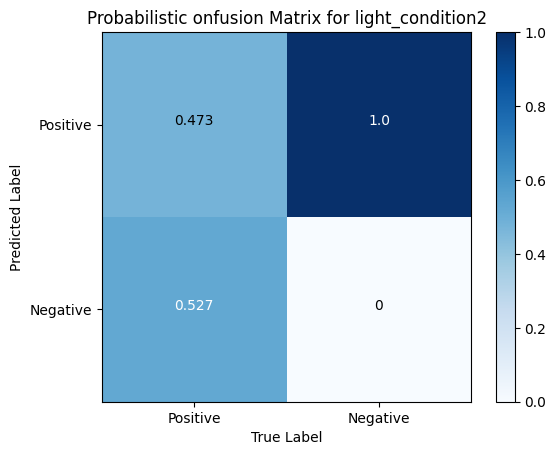



BOUNDING BOX ERRORS FOR light_condition2
IoU threshold:  0.5
Error of center x
Expected value: -4.933781811529926
Variance: 1651.9523895975606

Error of center y
Expected value: 0.8767817206208405
Variance: 518.3095474396591

Error of width
Expected value: 1.1189423946784913
Variance: 6357.5771550427025

Error of height
Expected value: -10.987515933481163
Variance: 697.971937444179


 DROPOUT STATS


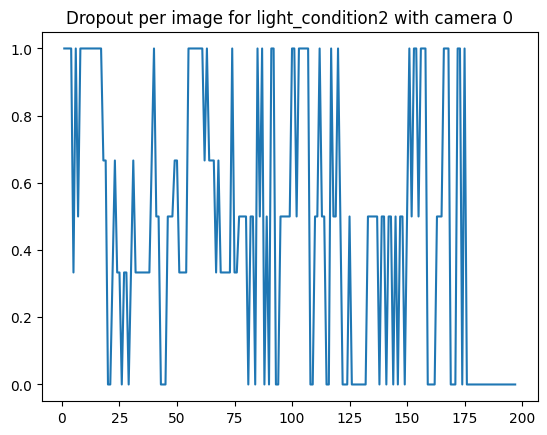

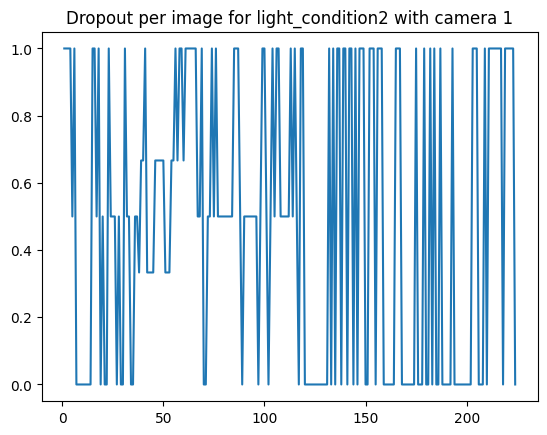

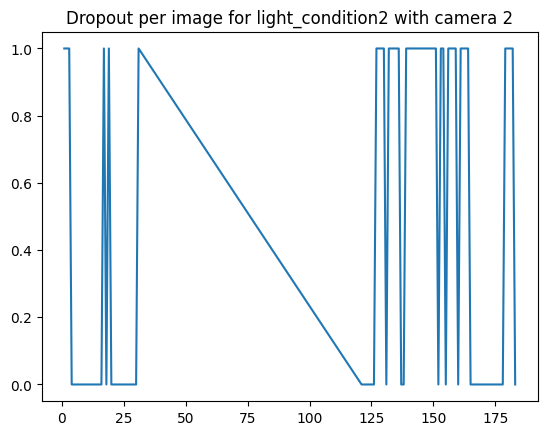

In [12]:
condition_name = 'light_condition2'
condition_folders = light_condition2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Light condition 3

In [9]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_light_condition3.txt' imgsz=640 name=test_light_condition3 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[226 313]
 [585   0]]
Precision:
0.41929499072356213
Recall:
0.2786683107274969


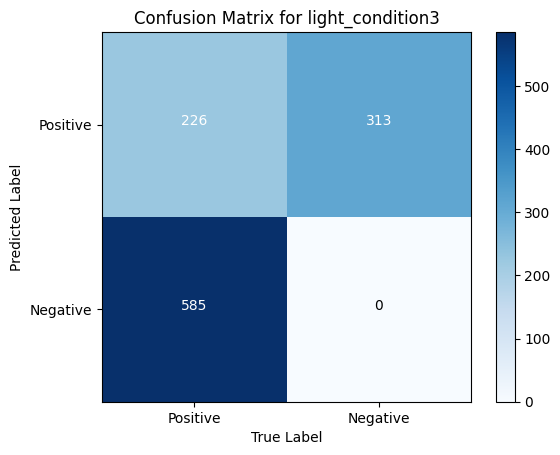

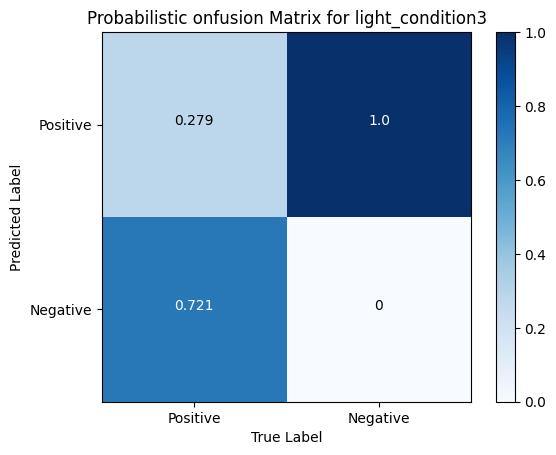



BOUNDING BOX ERRORS FOR light_condition3
IoU threshold:  0.5
Error of center x
Expected value: 6.335591329831933
Variance: 1170.3292238601193

Error of center y
Expected value: 8.126639470588225
Variance: 55.11123281401893

Error of width
Expected value: 10.099589693277297
Variance: 6685.598662109521

Error of height
Expected value: 3.4758187815126007
Variance: 453.5008668910783


 DROPOUT STATS


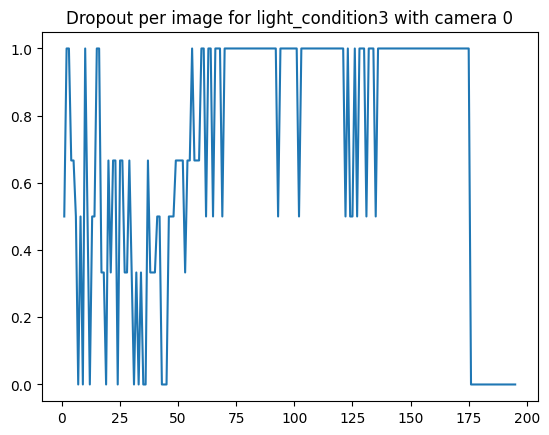

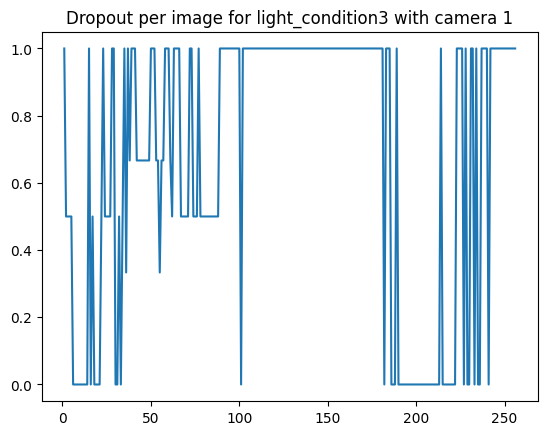

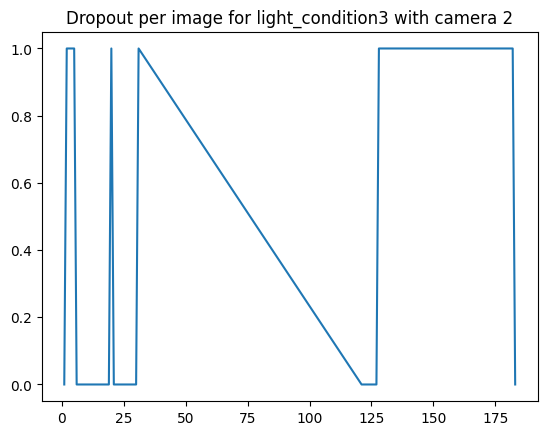

In [13]:
condition_name = 'light_condition3'
condition_folders = light_condition3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Cloud in various light conditions

### Cloud and light1

In [12]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light1.txt' imgsz=640 name=test_cloud_light1 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[542 118]
 [185   0]]
Precision:
0.8212121212121212
Recall:
0.7455295735900963


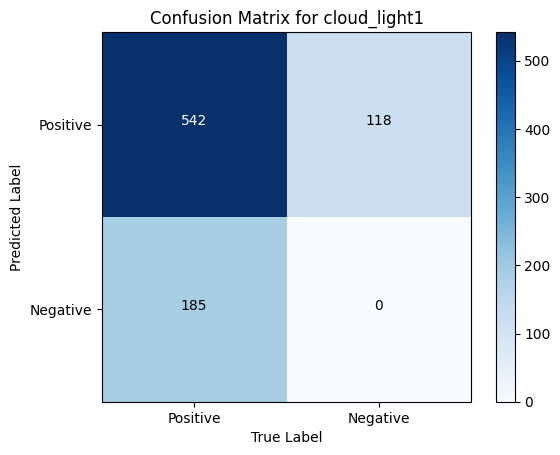

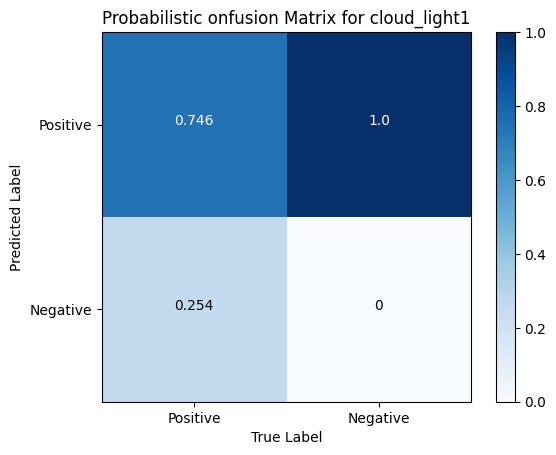



BOUNDING BOX ERRORS FOR cloud_light1
IoU threshold:  0.5
Error of center x
Expected value: 0.5782647136524796
Variance: 51.50092642139135

Error of center y
Expected value: 0.7527345611702169
Variance: 214.96648615717717

Error of width
Expected value: 5.91702000886524
Variance: 231.03988522900488

Error of height
Expected value: 4.454576413120565
Variance: 875.2017385509068


 DROPOUT STATS


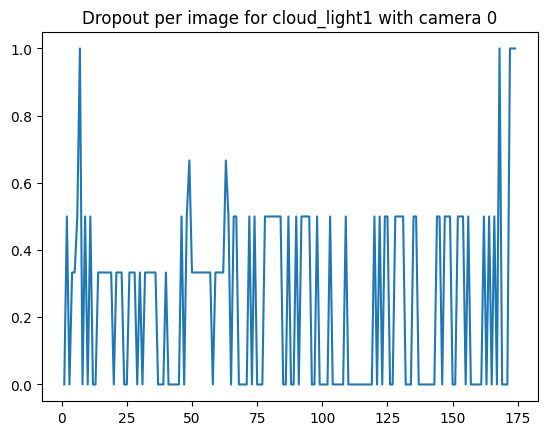

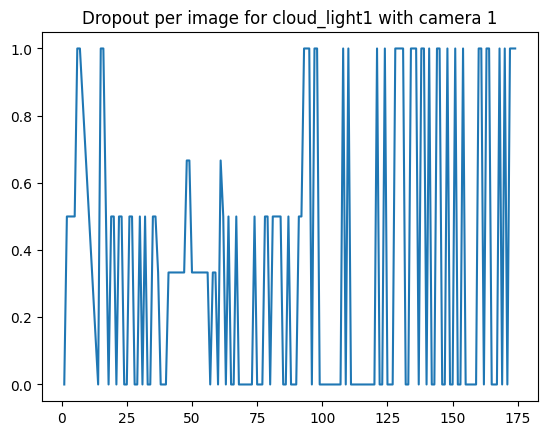

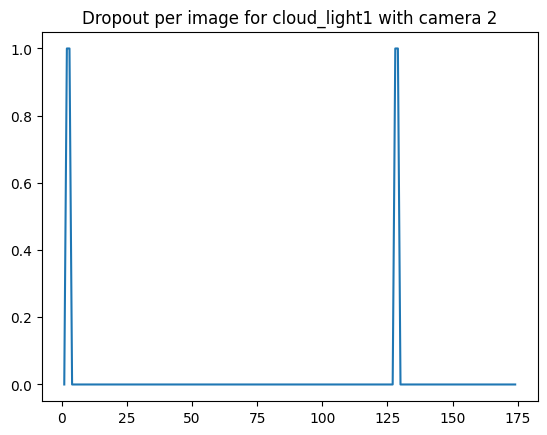

In [14]:
condition_name = 'cloud_light1'
condition_folders = cloud_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light2

In [27]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light2.txt' imgsz=640 name=test_cloud_light2 save=True save_conf=True save_txt=True

Displaying stats
Confusion matrix:
[[  91 2171]
 [ 689    0]]
Precision:
0.040229885057471264
Recall:
0.11666666666666667


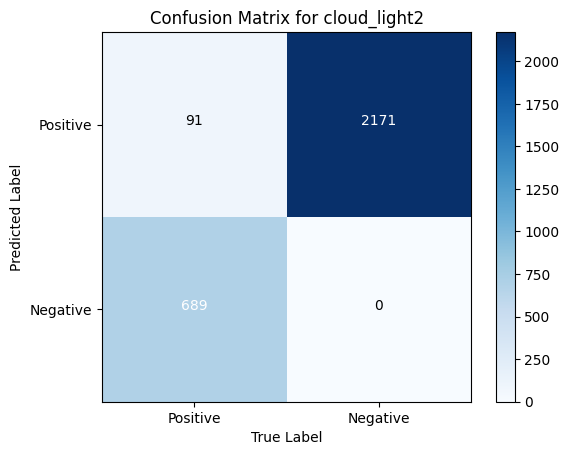

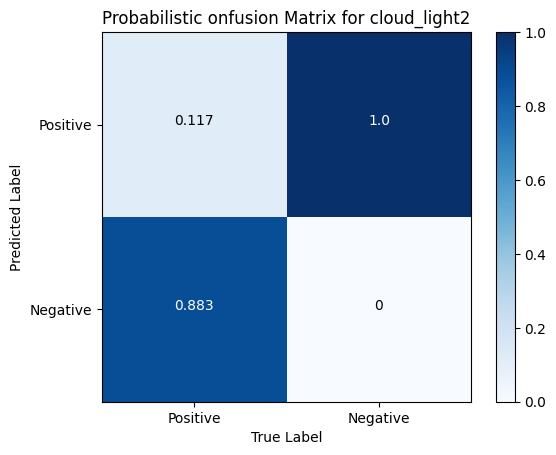



BOUNDING BOX ERRORS FOR cloud_light2
IoU threshold:  0.5
Error of center x
Expected value: -6.111211104395607
Variance: 1976.670724567406

Error of center y
Expected value: 3.9839512802197814
Variance: 2962.3180877546106

Error of width
Expected value: -22.988739681318684
Variance: 6368.724450501626

Error of height
Expected value: -9.489040956043937
Variance: 970.0294572203001


 DROPOUT STATS


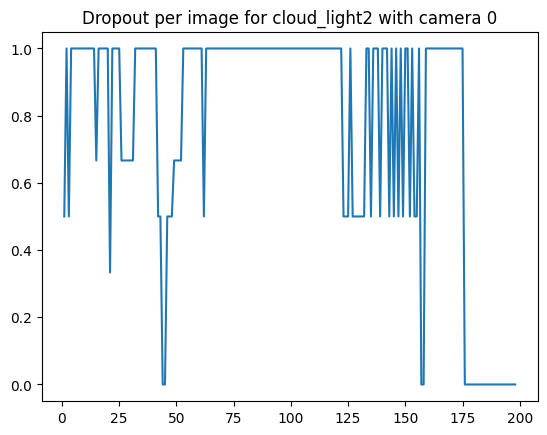

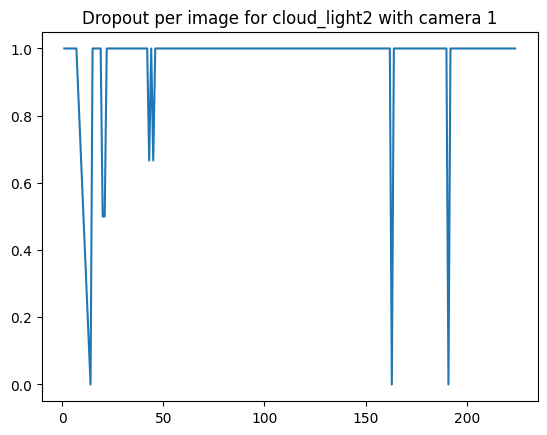

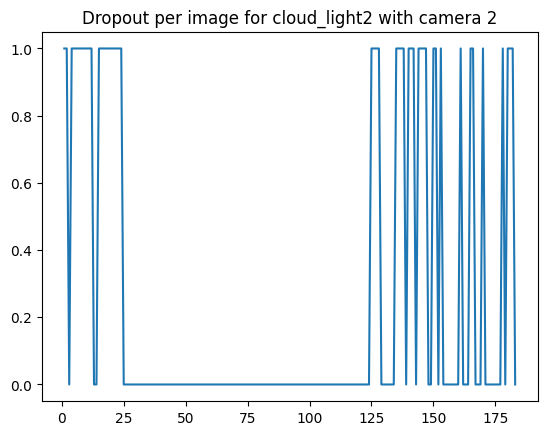

In [28]:
condition_name = 'cloud_light2'
condition_folders = cloud_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Cloud and light 3

In [16]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_cloud_light3.txt' imgsz=640 name=test_cloud_light3 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[209  92]
 [518   0]]
Precision:
0.6943521594684385
Recall:
0.2874828060522696


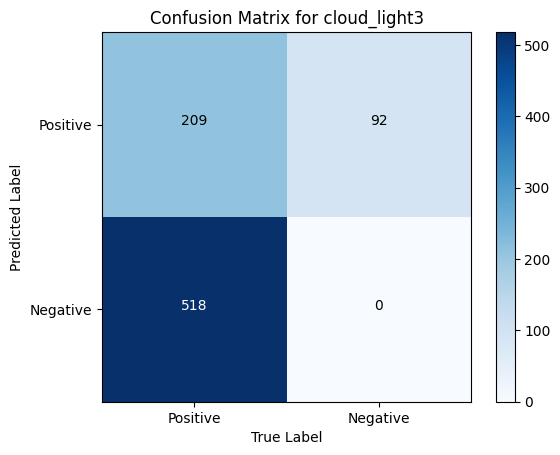

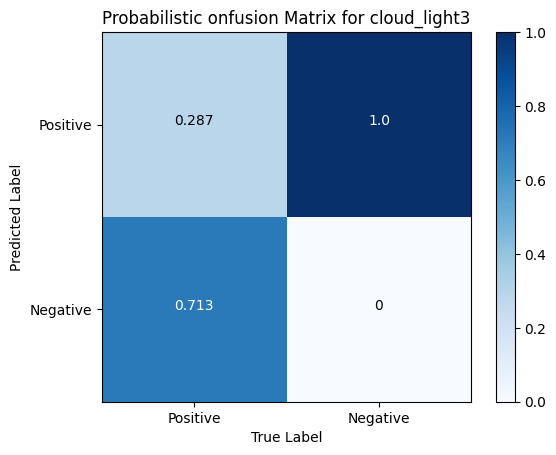



BOUNDING BOX ERRORS FOR cloud_light3
IoU threshold:  0.5
Error of center x
Expected value: 5.518923111374401
Variance: 574.3653525542192

Error of center y
Expected value: 12.334540483412326
Variance: 611.3732176819905

Error of width
Expected value: -35.75801202369671
Variance: 3771.990698291306

Error of height
Expected value: -18.865272862559255
Variance: 963.4898096080844


 DROPOUT STATS


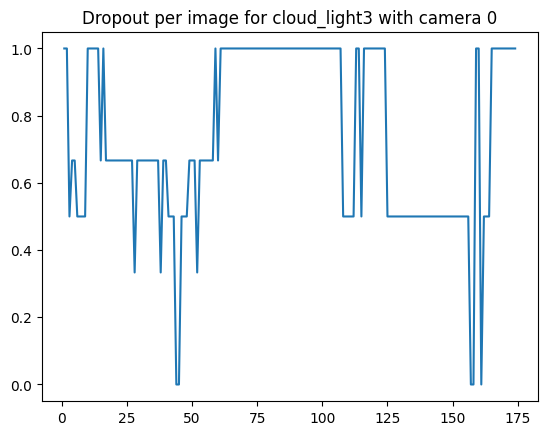

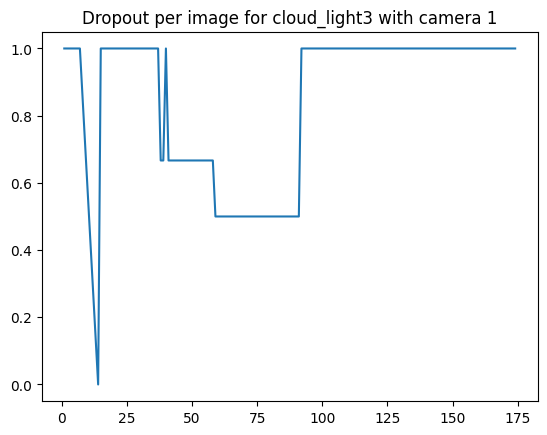

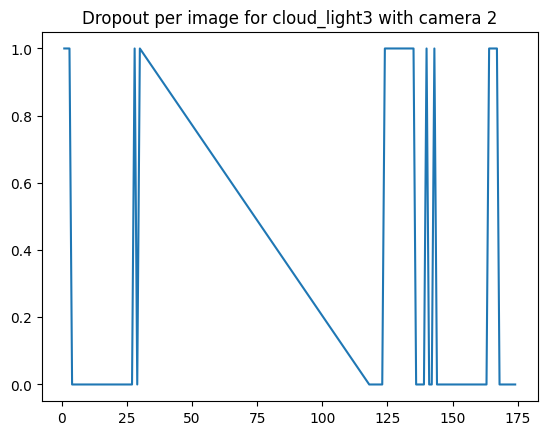

In [29]:
condition_name = 'cloud_light3'
condition_folders = cloud_light3
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Rain

### Rain light 1

In [14]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light1.txt' imgsz=640 name=test_rain_light1 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[663  39]
 [ 92   0]]
Precision:
0.9444444444444444
Recall:
0.8781456953642384


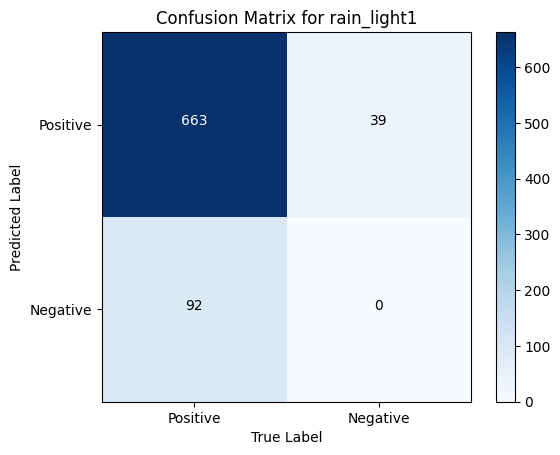

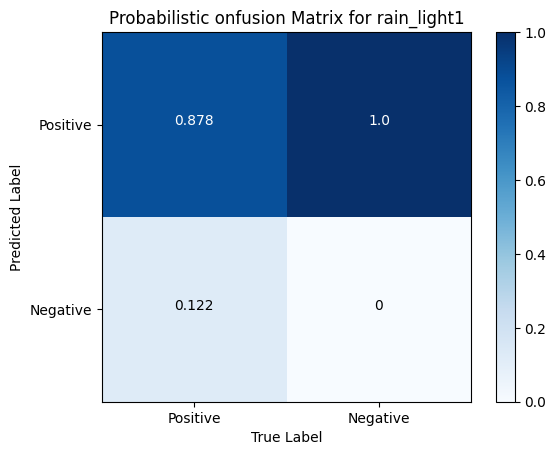



BOUNDING BOX ERRORS FOR rain_light1
IoU threshold:  0.5
Error of center x
Expected value: 0.23275108247422654
Variance: 540.7047746226806

Error of center y
Expected value: 1.2388084086892517
Variance: 87.69722877441465

Error of width
Expected value: 9.24422180559647
Variance: 2209.5777291499207

Error of height
Expected value: 4.119253951399111
Variance: 496.7119232664568


 DROPOUT STATS


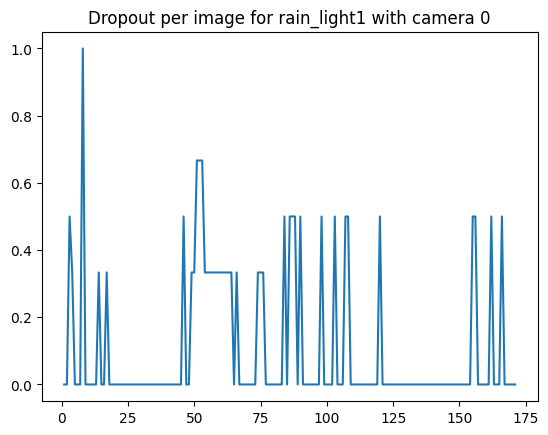

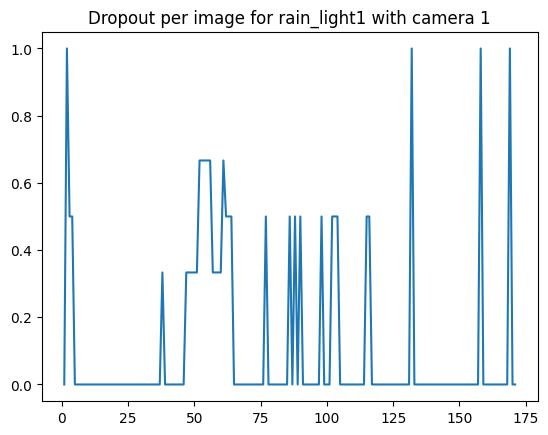

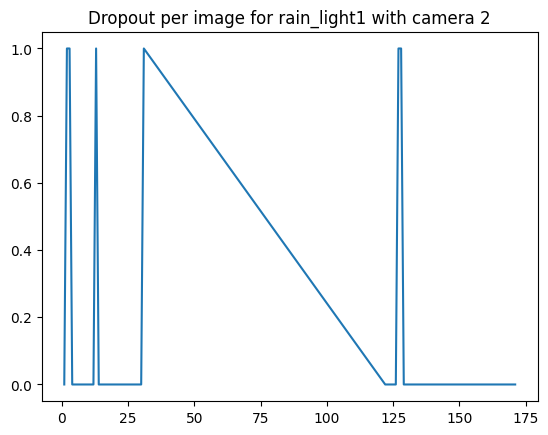

In [20]:
condition_name = 'rain_light1'
condition_folders = rain_light1
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

### Rain light 2

In [16]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_rain_light2.txt' imgsz=640 name=test_rain_light2 save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[ 350 1091]
 [ 429    0]]
Precision:
0.24288688410825815
Recall:
0.4492939666238768


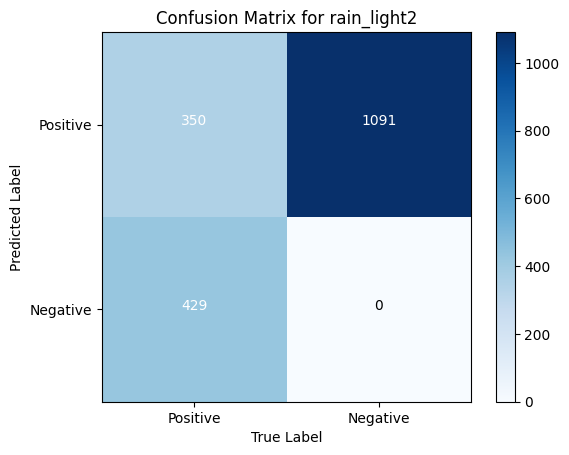

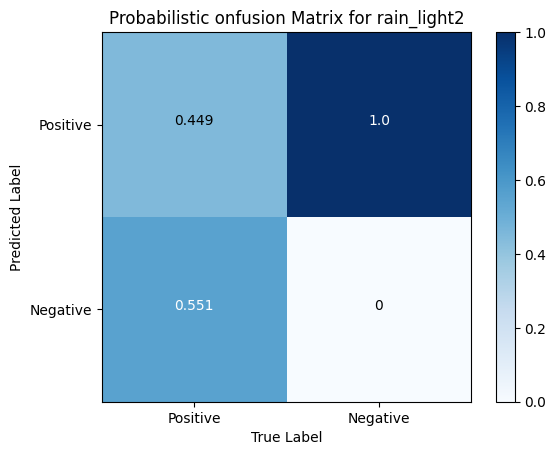



BOUNDING BOX ERRORS FOR rain_light2
IoU threshold:  0.5
Error of center x
Expected value: 11.731841562670304
Variance: 2808.6249993437928

Error of center y
Expected value: 4.12604722070845
Variance: 575.2493218985413

Error of width
Expected value: 23.85564933787466
Variance: 12347.294791424029

Error of height
Expected value: 7.105085591280662
Variance: 1014.2916569889217


 DROPOUT STATS


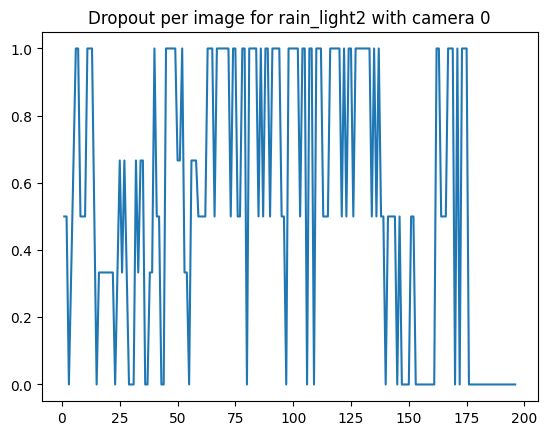

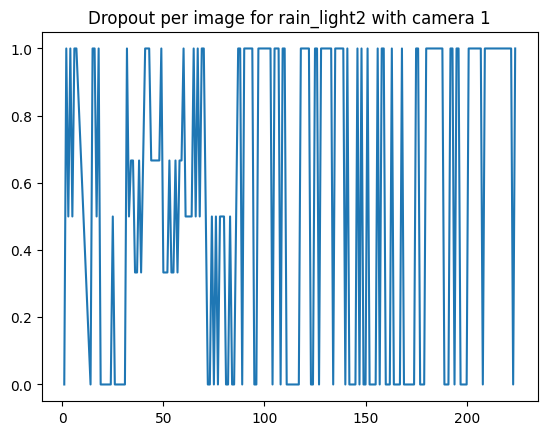

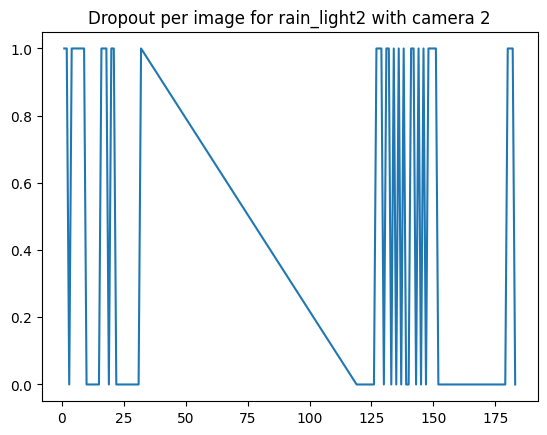

In [30]:
condition_name = 'rain_light2'
condition_folders = rain_light2
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Fog

In [18]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_foggy.txt' imgsz=640 name=test_foggy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  0   1]
 [810   0]]
Precision:
0.0
Recall:
0.0


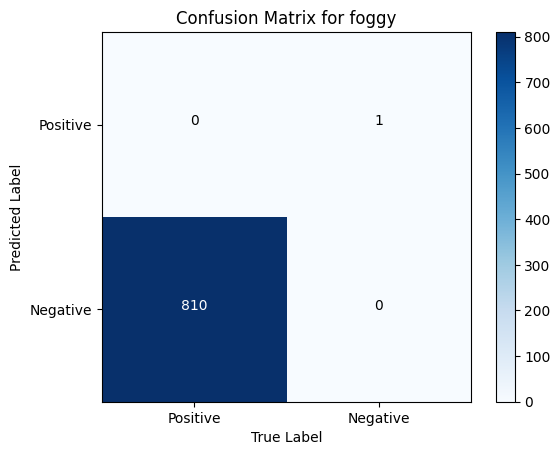

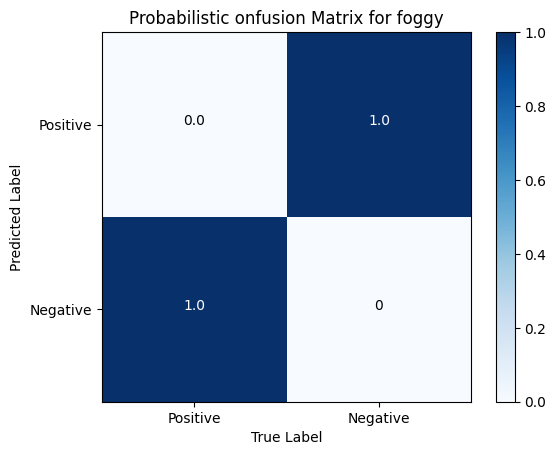



BOUNDING BOX ERRORS FOR foggy
IoU threshold:  0.5
Error of center x


ZeroDivisionError: division by zero

In [22]:
condition_name = 'foggy'
condition_folders = foggy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy

In [20]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy.txt' imgsz=640 name=test_stormy save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[ 34  35]
 [689   0]]
Precision:
0.4927536231884058
Recall:
0.04702627939142462


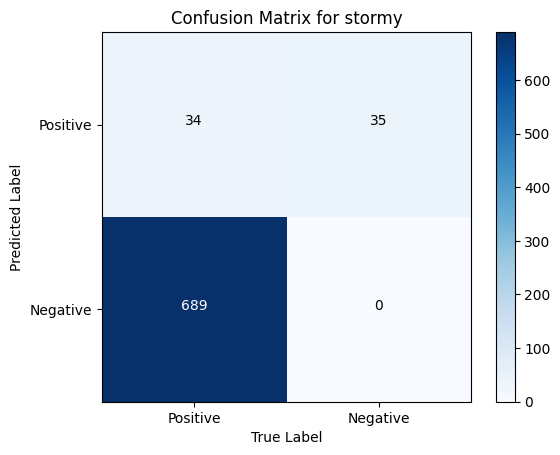

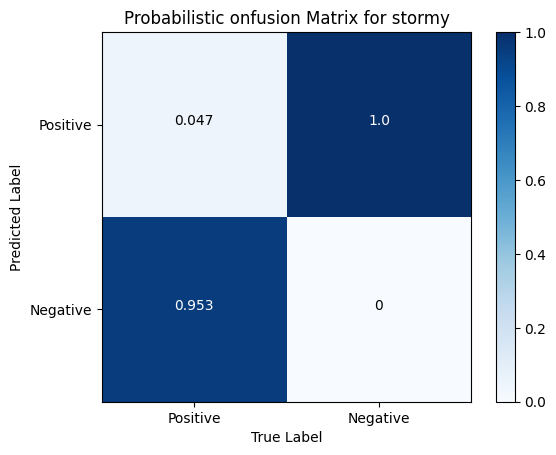



BOUNDING BOX ERRORS FOR stormy
IoU threshold:  0.5
Error of center x
Expected value: 3.3842830588235238
Variance: 183.39801886512853

Error of center y
Expected value: 0.8214766911764755
Variance: 2.1505972348068023

Error of width
Expected value: -3.6209667647058787
Variance: 1035.1288078541381

Error of height
Expected value: -7.070070264705892
Variance: 35.99072437699106


 DROPOUT STATS


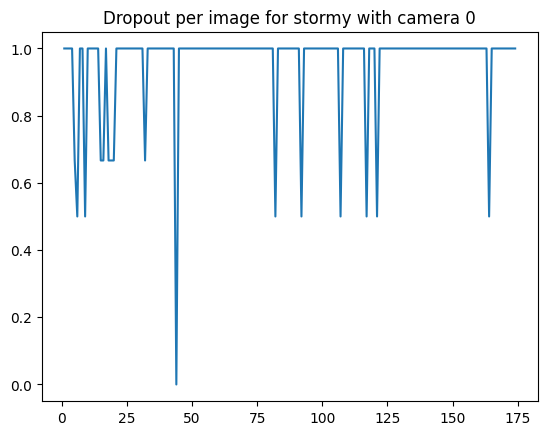

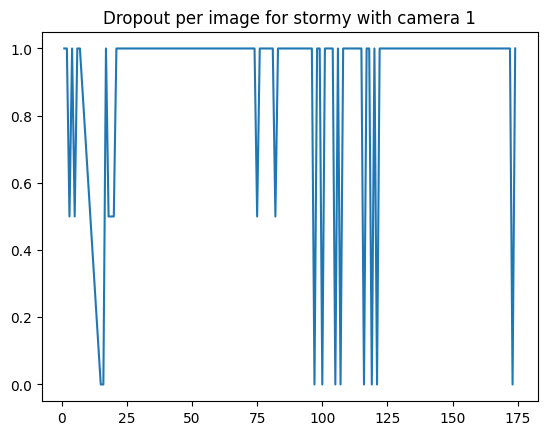

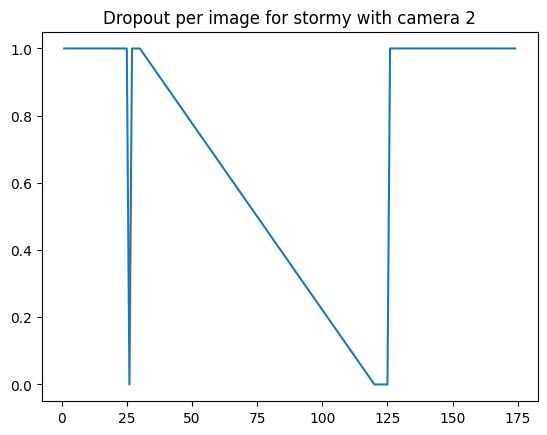

In [23]:
condition_name = 'stormy'
condition_folders = stormy
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)

## Stormy and rain

In [22]:
#!yolo task=detect mode=predict model=/cluster/work/solveijm/MODSIM/runs/detect/train_synthetich_and_hurtigruta/weights/best.pt source='/cluster/home/solveijm/DNV_data/test_stormy_rain.txt' imgsz=640 name=test_stormy_rain save=True save_conf=True save_txt=True


Displaying stats
Confusion matrix:
[[  0   1]
 [708   0]]
Precision:
0.0
Recall:
0.0


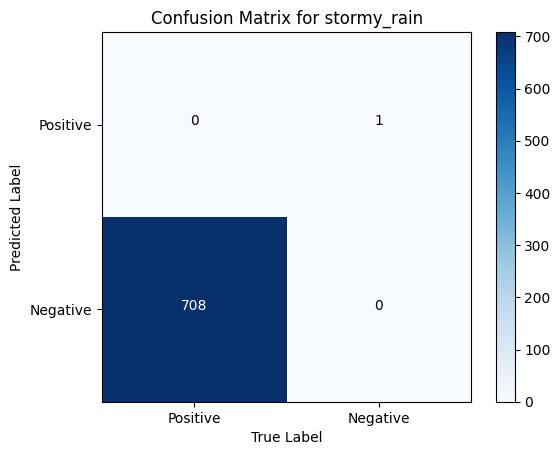

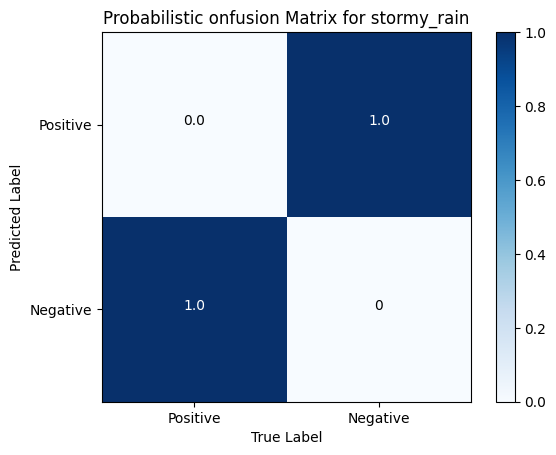



BOUNDING BOX ERRORS FOR stormy_rain
IoU threshold:  0.5
Error of center x


ZeroDivisionError: division by zero

In [24]:
condition_name = 'stormy_rain'
condition_folders = stormy_rain
GROUND_TRUTH_PATHS = [os.path.join(SYNTETIC_DATA_DIRECTORY, folder) for folder in condition_folders]
PREDICTED_PATH = f'../../runs/detect/test_{condition_name}/labels'

display_stats_main(GROUND_TRUTH_PATHS, PREDICTED_PATH, iou_treshold, IMAGE_WIDTH, IMAGE_HEIGHT, name=condition_name)